# Data Arts Module 1: Coincidence, correlation, causation

To prepare for this mission, first collect a week's worth of data on two quantifiable phenomena in your life, such as hours of sleep and typing rate. Collect the data with as little variation as possible to reduce confounds.

For this example, we will randomly generate sleep data for 2 months from a normal distribution, with an average of 8 hours and a standard deviation of 2 hours.

In [1]:
from datetime import date, timedelta  # to calculate differences between dates
import random  # to generate random numbers
import numpy as np  # to use logs

d1 = date(2017, 5, 1)  # start date
d2 = date(2017, 7, 1)  # end date

# get datetime objects for each day
collection_dates = [d1 + timedelta(days=i) for i in range((d2 - d1).days + 1)]

# create list of days with generated sleep hours
sleep_hours = [random.normalvariate(8, 2) for i in range(len(collection_dates))]

# generate pullups for each day increasing the distribution logarithmically
pullups = 10  # start average of pullups
num_pullups = []
for i in range(len(collection_dates)):
    num_pullups.append(int(random.normalvariate(pullups + np.log(i+1), .5)))

We will first import Python's data analysis library `pandas`. With `pandas`, we can read our data from a CSV (comma separated value) file that may have been exported from Excel or Google Sheets. Since we've generated our data here, we'll just assign the data directly into a data frame.

In [2]:
import pandas as pd  # a data analysis library

df= pd.DataFrame({'Hours of Sleep': sleep_hours,
                    'Number of Pullups': num_pullups},
                    index=collection_dates)

If you've worked with any statistical software before, a `pandas` data frame likely functions very similarly. It is a Python object that works like a table. Let's look at it:

In [3]:
df

,Hours of Sleep,Number of Pullups
2017-05-01,7.262778,10
2017-05-02,7.858978,10
2017-05-03,8.507657,10
2017-05-04,5.186111,11
2017-05-05,8.807401,12
2017-05-06,6.863656,11
2017-05-07,6.809892,11
2017-05-08,5.498593,11
2017-05-09,6.371094,12
2017-05-10,7.052400,12


Great! It read in our data and assigned our observations to dates. `pandas` also provides an easy plotting method, simply `plot`:

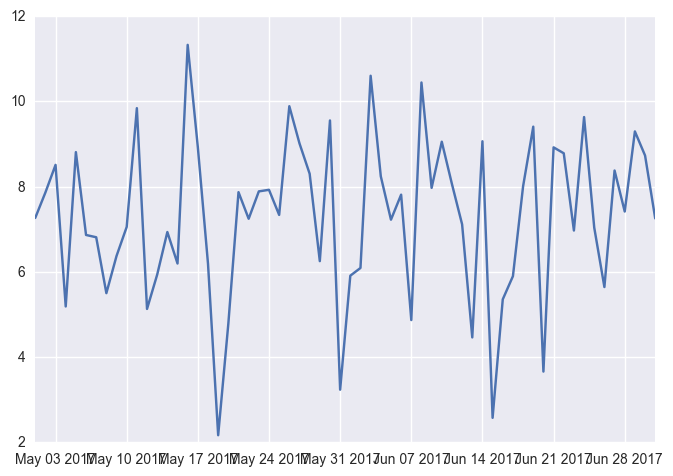

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt  # Python's plotting library
import seaborn as sns  # makes matplotlib prettier

df['Hours of Sleep'].plot()

That's a good start! But our x-axis is all blended together. We'll have to add in "parameters" to tell `pandas` more specific details about how our chart should look. Let's first use `rot` to rotate the labels:

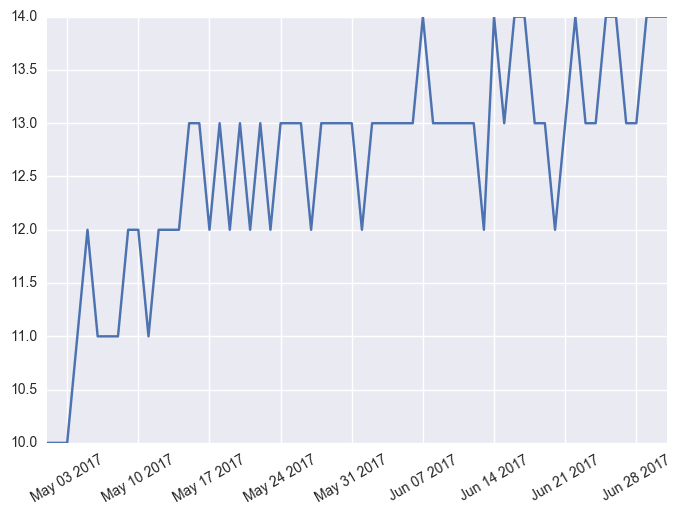

In [5]:
df['Number of Pullups'].plot(rot=30)

`rot=30` rotated our x-axis labels by 30 degrees. Now it's legible. Try adding a `title` to your plot below. If you can't guess the name of the parameter, try looking at the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) for the `plot` method.

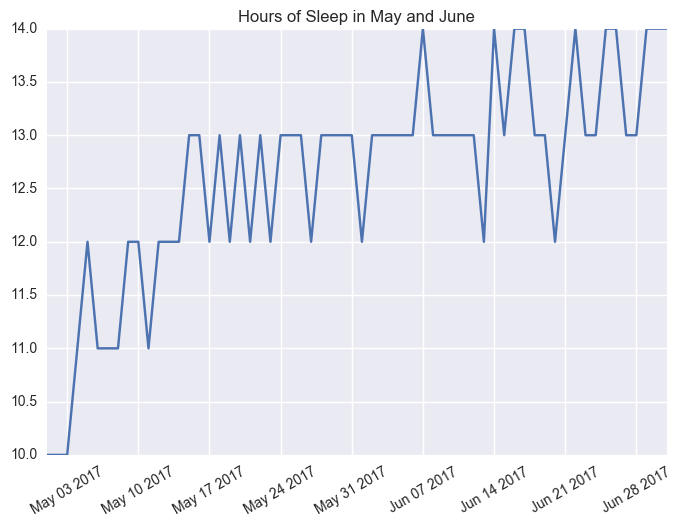

In [6]:
## CHALLENGE

## SOLUTION
df['Number of Pullups'].plot(rot=30, title='Hours of Sleep in May and June')

Now feel free to experiment with plotting the other data you've collected!

In [7]:
## EXPLORATION

So how can we plot everything at once? Well that's actually easier, we just tell `pandas` to plot the whole thing:

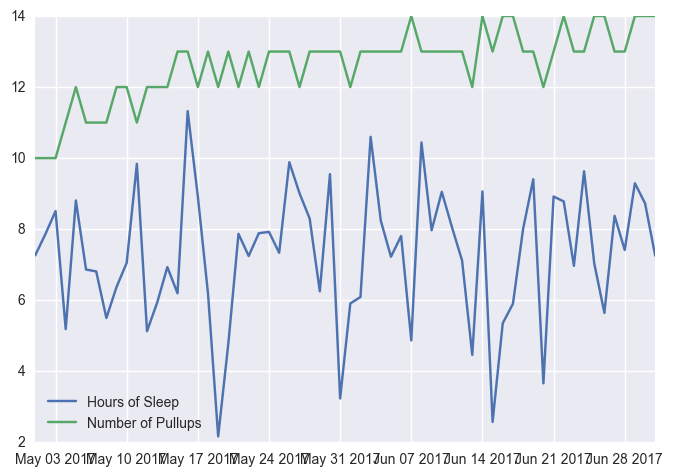

In [8]:
df.plot()

Now try adding in parameters to clean this up. To change colors, look at the `colormap` parameters, possible options are [here](# https://matplotlib.org/examples/color/colormaps_reference.html).

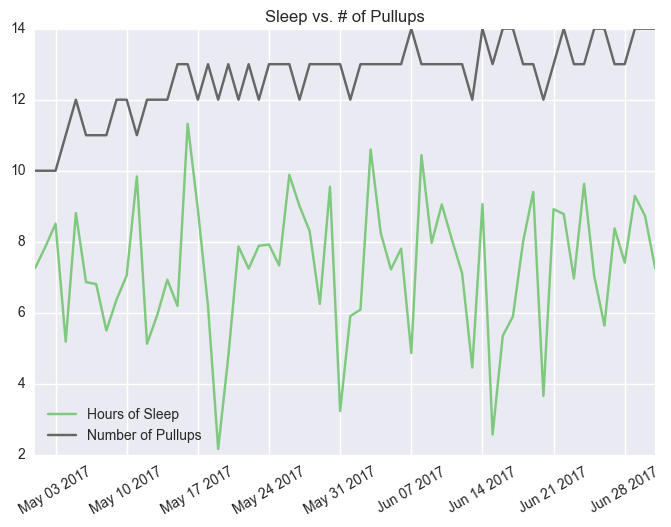

In [9]:
## CHALLENGE


## POSSIBLE SOLUTION
df.plot(kind='line', rot=30, title='Sleep vs. # of Pullups', colormap="Accent")

Can we make subplots?

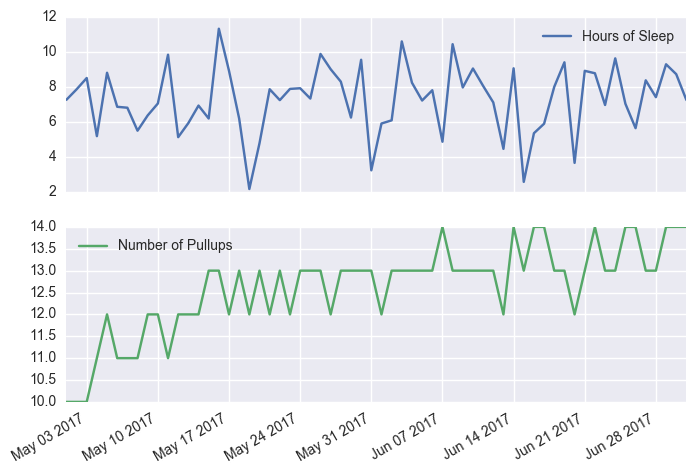

In [10]:
## CHALLENGE

## SOLUTION
ax = df.plot(kind='line', rot=30, subplots=True)

## Saving to PNG

To save the figure, we have to assign it first to a variable, then we'll just call the `savefig` method.

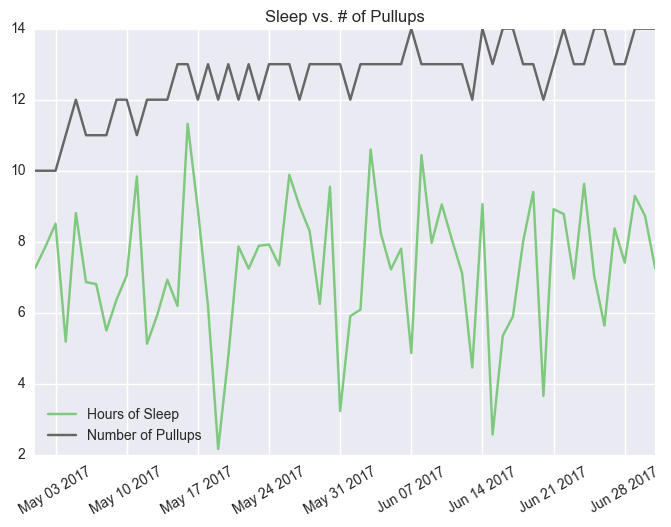

In [11]:
ax = df.plot(kind='line', rot=30, title='Sleep vs. # of Pullups', colormap="Accent")
fig = ax.get_figure()
fig.savefig('sleep-vs-pullups.png')

OK. But when we look at the output, it's quite poor quality, and it's cutting off our x-axis labels! How can we fix this?

**HINT:** Look at the `tight_layout` method and the `DPI` parameter [here](https://matplotlib.org/api/pyplot_api.html)

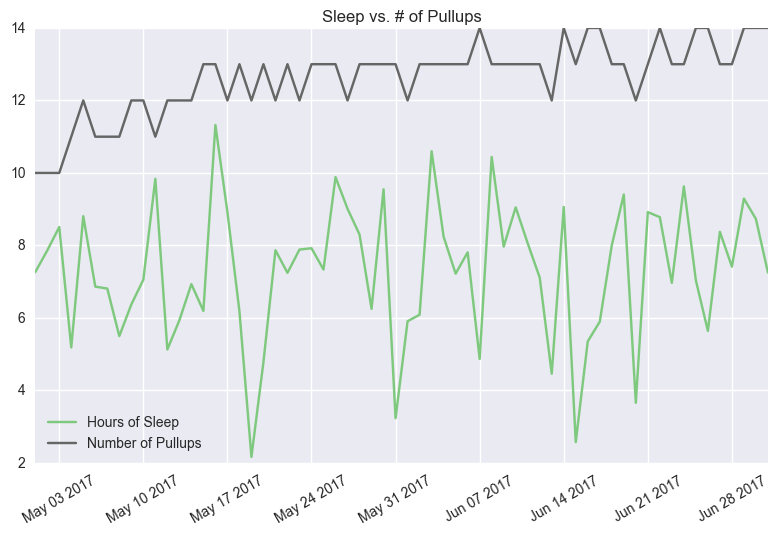

In [12]:
## CHALLENGE


## SOLUTION
ax = df.plot(kind='line', rot=30, title='Sleep vs. # of Pullups', colormap="Accent")
fig = ax.get_figure()
fig.tight_layout()  # makes PNG formatted better
fig.savefig('sleep-vs-pullups.png', dpi=1000)

Now that we've got everything charted nicely, let's see if we can detect any relationships in our data.

## Correlation

One of the most common and basic measures of correlation in [Pearson's `r`](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which is defined as:

$$ r = \frac{n (\sum{xy})-(\sum{x})(\sum{y})}{\sqrt{ [n \sum{x^2}-(\sum{x})^2 ][n \sum{y^2}-(\sum{y})^2 }]} $$

where `x` and `y` are two variables.

If we're looking at hours of sleep and pullups, we can calculate Pearson's `r` with the `scipy` library:

In [13]:
from scipy.stats.stats import pearsonr  

pearsonr(df['Number of Pullups'], df['Hours of Sleep'])

(0.085274134112385297, 0.50990446336633377)

If you look at the [documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) for `pearsonr`, you'll see it is returning first `r`, or the correlation coefficient, and secondly a 2-tailed p-value.

## Interpretation

So it looks like here there is no correlation whatsoever between sleep and pullups. This make sense, because sleep never changed from the normal distribution, while pullups slowly logarithmically increased. Number of pullups, initially, is probably more related to training. You might get some progress at the begining, but will level off if nothing else change (hence the logarithmic scale).

Post the plot image, your correlation number, and your conclusion about the nature of your phenomena to the course assets. Review and discuss the observations of other students. Remeber that your or your peers data could be real or fake, and that your conclusion could be reasonable, humorous or lyrical. 

## Prediction

If our pullup data wasn't randomly generated, we could also build a model to predict how many pullups we might get in the future. Let's try for the sake of demonstration.

We'll first fit our pullups to a simple linear OLS model using `scipy` and the `curve_fit` method:

In [14]:
import scipy

# define linear OLS function
def linear_func(x, a, b):
    return a*x + b

# fit function to data
popt, pcov = scipy.optimize.curve_fit(linear_func,  range(62),  df['Number of Pullups'])  # range for number of days

/Users/chench/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Now we can define a new range we want to predict on, let's do 100 more days:

/Users/chench/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


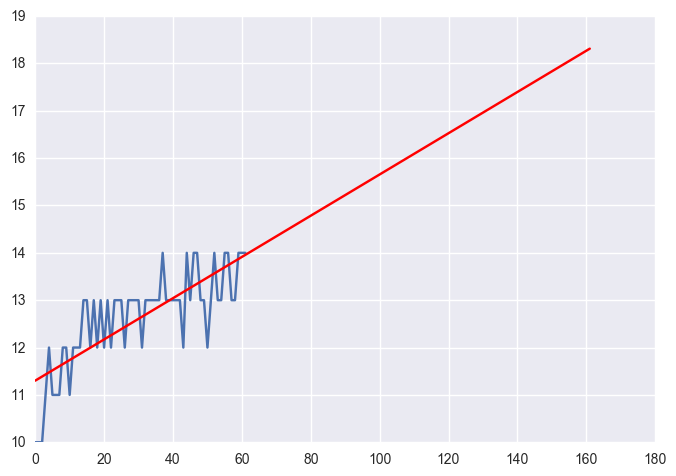

In [15]:
x_new = range(0,162)

# plot collected data
plt.plot(range(62), df['Number of Pullups'])

# plot fitted curve
plt.plot(x_new, linear_func(x_new, *popt), 'r-', label='fit')

It's hard to tell, but we can see that a linear model does not fit a logarithmic curve very well. Let's try defining a log function instead:

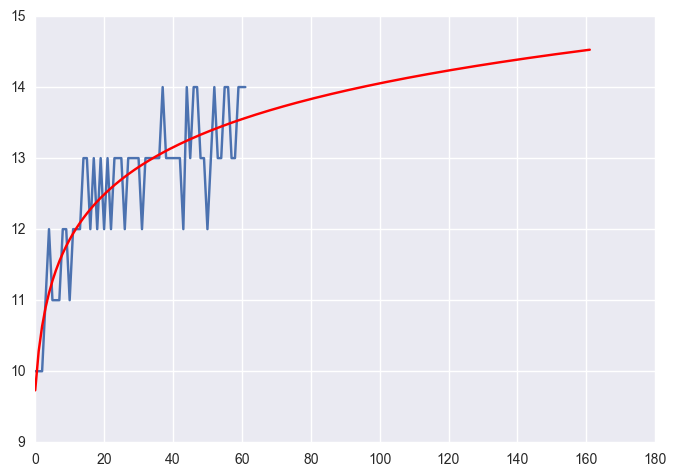

In [16]:
def log_func(x, a, b,c):
    return a*np.log2(c+x)+b

popt, pcov = scipy.optimize.curve_fit(log_func,  range(62),  df['Number of Pullups'])

x_new = range(0,162)

plt.plot(range(62), df['Number of Pullups'])
plt.plot(x_new, log_func(x_new, *popt), 'r-', label='fit')

That looks a little better, so if we continued for another 100 days, we'd hit a steady average of 15 pullups, not bad!